In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import precision_score,classification_report, auc, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_curve, precision_score

In [2]:
#Reading the dataset 

df_f = pd.read_csv("../data/training_set_features.csv")
df_f

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [34]:
# Get a list of column names with dtype 'object'
object_columns = df_f.select_dtypes(include=['object']).columns.tolist()
num_columns = df_f.select_dtypes(exclude=['object']).columns.tolist()
df_f_cat = df_f[object_columns]
df_f_cat

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [17]:
df_f_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age_group              26707 non-null  object
 1   education              25300 non-null  object
 2   race                   26707 non-null  object
 3   sex                    26707 non-null  object
 4   income_poverty         22284 non-null  object
 5   marital_status         25299 non-null  object
 6   rent_or_own            24665 non-null  object
 7   employment_status      25244 non-null  object
 8   hhs_geo_region         26707 non-null  object
 9   census_msa             26707 non-null  object
 10  employment_industry    13377 non-null  object
 11  employment_occupation  13237 non-null  object
dtypes: object(12)
memory usage: 2.4+ MB


In [5]:
df_t = pd.read_csv("../data/training_set_labels.csv")
df_t

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [18]:
X = df_f_cat.drop('age_group', axis=1)
y = df_t["h1n1_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
#
dummy_model = DummyClassifier(strategy='most_frequent')
#
dummy_model.fit(X_train, y_train)
#
dummy_model.predict(X_train)
#Accuracy score
print ('This is the accuracy score:', dummy_model.score(X_train, y_train))

This is the accuracy score: 0.7874687968047928


In [8]:

cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results.mean()

0.7874687968047928

# EDA

In [20]:
col_n_na= ['age_group','race','sex','hhs_geo_region','census_msa']

In [24]:
X1 = df_f_cat[col_n_na]
X1

,age_group,race,sex,hhs_geo_region,census_msa
0,55 - 64 Years,White,Female,oxchjgsf,Non-MSA
1,35 - 44 Years,White,Male,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,White,Male,qufhixun,"MSA, Not Principle City"
3,65+ Years,White,Female,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,White,Female,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...
26702,65+ Years,White,Female,qufhixun,Non-MSA
26703,18 - 34 Years,White,Male,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,White,Female,lzgpxyit,"MSA, Not Principle City"
26705,18 - 34 Years,Hispanic,Female,lrircsnp,Non-MSA


In [26]:
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()


X1_clean = ohe.fit_transform(X1).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
X1_ohe_df = pd.DataFrame(X1_clean, columns=ohe.get_feature_names(X1.columns))

X1_ohe_df.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Decision Tree model 


In [27]:
# spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X1_ohe_df, y, test_size= .33, random_state=42)

In [28]:
# Decision Tree Classifier 
rf_col_n_a = DecisionTreeClassifier(random_state=42)
rf_col_n_a.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# full data set model 

In [35]:
num_columns

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [59]:
X_n = pd.concat([df_f[num_columns], df_t['h1n1_vaccine']], axis=1)

In [62]:
X_c = pd.concat([X1_ohe_df, X_n], axis=1)
X_c.isna().sum()

age_group_18 - 34 Years                    0
age_group_35 - 44 Years                    0
age_group_45 - 54 Years                    0
age_group_55 - 64 Years                    0
age_group_65+ Years                        0
race_Black                                 0
race_Hispanic                              0
race_Other or Multiple                     0
race_White                                 0
sex_Female                                 0
sex_Male                                   0
hhs_geo_region_atmpeygn                    0
hhs_geo_region_bhuqouqj                    0
hhs_geo_region_dqpwygqj                    0
hhs_geo_region_fpwskwrf                    0
hhs_geo_region_kbazzjca                    0
hhs_geo_region_lrircsnp                    0
hhs_geo_region_lzgpxyit                    0
hhs_geo_region_mlyzmhmf                    0
hhs_geo_region_oxchjgsf                    0
hhs_geo_region_qufhixun                    0
census_msa_MSA, Not Principle  City        0
census_msa

In [63]:
#dropping the missing values 
X_cm= X_c.dropna()
X_cm.isna().sum()

age_group_18 - 34 Years                0
age_group_35 - 44 Years                0
age_group_45 - 54 Years                0
age_group_55 - 64 Years                0
age_group_65+ Years                    0
race_Black                             0
race_Hispanic                          0
race_Other or Multiple                 0
race_White                             0
sex_Female                             0
sex_Male                               0
hhs_geo_region_atmpeygn                0
hhs_geo_region_bhuqouqj                0
hhs_geo_region_dqpwygqj                0
hhs_geo_region_fpwskwrf                0
hhs_geo_region_kbazzjca                0
hhs_geo_region_lrircsnp                0
hhs_geo_region_lzgpxyit                0
hhs_geo_region_mlyzmhmf                0
hhs_geo_region_oxchjgsf                0
hhs_geo_region_qufhixun                0
census_msa_MSA, Not Principle  City    0
census_msa_MSA, Principle City         0
census_msa_Non-MSA                     0
respondent_id   

In [67]:
#determine X_sm and y_sm 
X_sm= X_cm.drop('h1n1_vaccine', axis =1)
y_sm =X_cm['h1n1_vaccine']

In [68]:
# Performing the split test
X_tr_samp, X_te_samp, y_tr_samp, y_te_samp = train_test_split(
    X_sm, y_sm,random_state=42)

In [69]:
y_sm.value_counts()

0    9475
1    4031
Name: h1n1_vaccine, dtype: int64

In [70]:
#Scaling the the data
scaler = StandardScaler()
scaler.fit(X_tr_samp)
X_tr_sc = scaler.transform(X_tr_samp)
X_te_sc = scaler.transform(X_te_samp)

In [71]:
from imblearn.over_sampling import SMOTE
# Instantiate our SMOTE
sm = SMOTE(random_state=42)
# Fit and resample on the training data! X_tr_samp, y_tr_samp
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr_sc, y_tr_samp)

In [72]:
#sanity check 
y_tr_smote.value_counts()

1    7069
0    7069
Name: h1n1_vaccine, dtype: int64

# ---- Decision Tree Model 1

In [75]:
#instantiation 
rf_clf_sm = DecisionTreeClassifier(random_state=42)
#fitting the model 
rf_clf_sm.fit(X_tr_smote, y_tr_smote)

DecisionTreeClassifier(random_state=42)

In [76]:
class mcalculation():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.precision_results = None  # New attribute for precision
        self.precision_mean = None
        self.precision_median = None
        self.precision_std = None
        #
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.

        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''

        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Precision scores
        y_pred = cross_val_predict(self.model, cv_X, cv_y, cv=kfolds)
        self.precision_results = [precision_score(cv_y, y_pred)]
        self.precision_mean = np.mean(self.precision_results)
        self.precision_median = np.median(self.precision_results)
        self.precision_std = np.std(self.precision_results)

    def print_cv_summary(self):
        cv_summary = (
            f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
            {self.precision_mean:.5f} ± {self.precision_std:.5f} precision
        ''')
        print(cv_summary)

    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
            y=self.cv_results,
            color='orange',
            size=10,
            alpha=0.8,
            ax=ax
        )

        return ax

In [80]:
rf_clf_sm_model_results = mcalculation(
                        model=rf_clf_sm ,
                        model_name='Decision Tree',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm_model_results.print_cv_summary()

CV Results for `Decision Tree` model:
            0.79623 ± 0.09573 accuracy
            0.79635 ± 0.00000 precision
        


In [90]:
def evaluate_model_performance(model, X_train_scaled, y_train):
    #X_test_scaled, y_test
    # Calculate roc-auc for test set
    #test_probs = model.predict_proba(X_test_scaled)[:, 1]
   # fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probs)
   # roc_auc_test = auc(fpr_test, tpr_test)

    # Print AUC for the test set
   # print('\nAUC for Test Set is: {:.2f}'.format(roc_auc_test))

    # Calculate roc-auc for train set
    train_probs = model.predict_proba(X_train_scaled)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Print AUC for the train set
    #print('\nAUC for Train Set is: {:.2f}'.format(roc_auc_train))

    # Plot ROC curves
    plt.figure(figsize=(12, 6))

    # Plot ROC curve for test set
   # plt.subplot(1, 2, 1)
    #plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
   # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   # plt.xlabel('False Positive Rate')
   # plt.ylabel('True Positive Rate')
   # plt.title('ROC Curve - Test Set')
    #plt.legend(loc='lower right')

    # Plot ROC curve for train set
    plt.subplot(1, 2, 2)
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Train Set')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # Create and print a confusion matrix
   # print('\nConfusion Matrix')
  #  print('----------------')
    #y_pred = model.predict(X_test_scaled)
   # confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
  #  print(confusion_matrix)

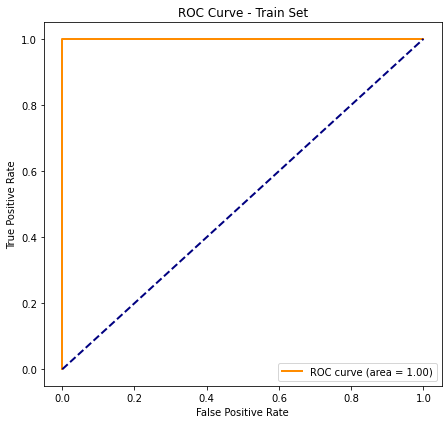

In [91]:
evaluate_model_performance(rf_clf_sm, X_tr_smote, y_tr_smote)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20],
}

rf_model = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr_smote, y_tr_smote)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

#Evaluate on the test set
#y_pred = grid_search.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print("Test set accuracy: {:.2f}".format(accuracy))

Best parameters found:  {'max_depth': 10}
Best cross-validated accuracy: 0.83


# ---- Decision Tree Model 2

In [96]:
#instantiation 
rf_clf_sm2 = DecisionTreeClassifier(max_depth=10,random_state=42)
#fitting the model 
rf_clf_sm2.fit(X_tr_smote, y_tr_smote)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [97]:
rf_clf_sm2_model_results = mcalculation(
                        model=rf_clf_sm2 ,
                        model_name='Decision Tree 2',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm2_model_results.print_cv_summary()

CV Results for `Decision Tree 2` model:
            0.83294 ± 0.08697 accuracy
            0.87092 ± 0.00000 precision
        


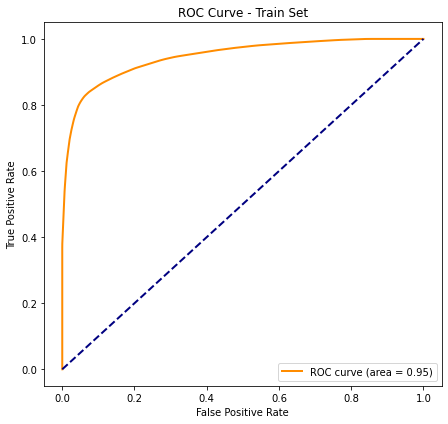

In [98]:
evaluate_model_performance(rf_clf_sm2, X_tr_smote, y_tr_smote)

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

rf_model = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr_smote, y_tr_smote)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

#Evaluate on the test set
#y_pred = grid_search.predict(X_test_scaled)
#accuracy = accuracy_score(y_test, y_pred)
#print("Test set accuracy: {:.2f}".format(accuracy))

Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validated accuracy: 0.82


# ---- Decision Tree Model 3

In [101]:
#instantiation 
rf_clf_sm3 = DecisionTreeClassifier(max_depth=7,min_samples_leaf=4,min_samples_split=5,random_state=42)
#fitting the model 
rf_clf_sm3.fit(X_tr_smote, y_tr_smote)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [102]:
rf_clf_sm3_model_results = mcalculation(
                        model=rf_clf_sm3 ,
                        model_name='Decision Tree 3',
                        X=X_tr_smote, 
                        y=y_tr_smote
);
rf_clf_sm3_model_results.print_cv_summary()

CV Results for `Decision Tree 3` model:
            0.82417 ± 0.07288 accuracy
            0.86918 ± 0.00000 precision
        


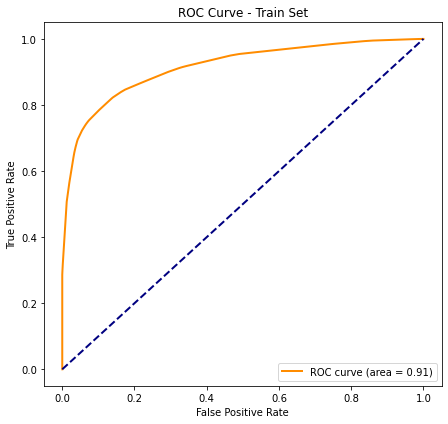

In [103]:
evaluate_model_performance(rf_clf_sm3, X_tr_smote, y_tr_smote)

In [105]:
print('Model 1: ')
rf_clf_sm_model_results.print_cv_summary()

print('Model 2: ')
rf_clf_sm2_model_results.print_cv_summary()

print('Model 3: ')
rf_clf_sm3_model_results.print_cv_summary()


Model 1: 
CV Results for `Decision Tree` model:
            0.79623 ± 0.09573 accuracy
            0.79635 ± 0.00000 precision
        
Model 2: 
CV Results for `Decision Tree 2` model:
            0.83294 ± 0.08697 accuracy
            0.87092 ± 0.00000 precision
        
Model 3: 
CV Results for `Decision Tree 3` model:
            0.82417 ± 0.07288 accuracy
            0.86918 ± 0.00000 precision
        
